 # **1. Explicación descriptiva del proyecto**


## **Título**:  De Datos a Predicciones: Energía Solar Inteligente

 ***Descripción del Proyecto:***

Este proyecto tiene como objetivo entrenar y optimizar modelos de Machine Learning para resolver una problemática específica detectada en el análisis previo de funcionamiento de un parque solar fotovoltaico.
A partir de datos obtenidos de APIs meteorológicas, bases de datos públicas y mediciones reales en sitio, se busca comprender cómo las condiciones ambientales influyen en la generación de energía y validar modelos predictivos que permitan estimar la producción energética diaria o mensual.

Mediante técnicas de análisis exploratorio de datos (EDA) y visualización, se obtendrán insights que orienten la selección de variables más relevantes para el modelo. Posteriormente, se aplicarán algoritmos de Machine Learning supervisado, como Decision Tree y Random Forest, con el fin de predecir la energía generada y evaluar su desempeño mediante métricas estadísticas.

El trabajo se desarrollará en Python (Google Colab) utilizando bibliotecas como pandas, matplotlib, seaborn, scikit-learn y pvlib para la adquisición, limpieza, modelado y validación de datos.



---

# **2. Glosario**


* **Energía:** Cantidad total de energía generada en un período determinado. Se mide comúnmente en kilowatt-hora (kWh).

* **Strings:**Conjunto de paneles solares conectados en serie. Cada string alimenta energía al inversor.

* **Potencia activa:** Es la energía útil que fluye instantáneamente por el sistema eléctrico. Se mide en kilowatts (kW).

* **Tensión:** Es el voltaje eléctrico presente en los strings o inversores. Se mide en voltios (V) y puede variar por condiciones de operación.

* **SmartLogger:** Dispositivo central que monitorea, coordina y recopila los datos de todos los inversores del sistema. Permite gestionar y supervisar el funcionamiento global.

* **Inversor:** Dispositivo que convierte la energía en corriente continua (DC), proveniente de los paneles solares, en corriente alterna (AC), apta para ser inyectada en la red eléctrica del cliente final.

# **3. Preguntas e hipótesis de interés**




### ***Preguntas de análisis:***



**1.**  ¿Son representativos los datos obtenidos desde las APIs externas y librerías en comparación con los datos reales en sitio, considerando los parámetros de radiación, viento y posición del tracker?


**2.**  ¿Cuál de las APIs analizadas presenta una mayor precisión o mejor correlación con los datos reales de radiación solar?

**3.**  ¿Se detectan anomalías o desviaciones significativas en la posición de los trackers respecto al ángulo teórico calculado?

**4.**  ¿Cómo puede cuantificarse la energía perdida cuando la posición real del tracker difiere de la posición óptima?

**5.**  Con los datos obtenidos, ¿es posible entrenar un modelo predictivo que estime la energía generada mensualmente a partir de las variables meteorológicas proporcionadas por las APIs?

**6.**  ¿Con qué nivel de confianza o porcentaje de error puede validarse la predicción de energía generada por dicho modelo?

**7.**  Dado que el viento influye directamente en la posición de los trackers, ¿es correcto afirmar que cuando los trackers se encuentran en -30°, los valores de velocidad del viento tienden a ser más elevados?





### ***Hipótesis posibles:***


**H1:** **Representatividad de APIs y librerías**

Los datos obtenidos desde las APIs externas y la librería PVLIB presentan una alta correlación con los datos reales en sitio (R² > 0.9) para las variables de radiación, viento y posición del tracker.

**H2:** **Mejor API de radiación**

La API de Solcast muestra el menor error medio absoluto (MAE) y la mayor correlación respecto a la radiación medida por la estación meteorológica del parque.

**H3:** **Anomalías en posición de trackers**

Existen desviaciones puntuales en la posición real de los trackers respecto al ángulo teórico, principalmente asociadas a condiciones de viento elevado o fallas mecánicas/locales.

**H4:** **Relación entre viento y posición del tracker (-30°)**

Cuando los trackers se ubican en -30°, se observa un aumento significativo en la velocidad del viento, lo cual indica una posición de seguridad para proteger la estructura frente a ráfagas altas.

**H5:** **Modelo predictivo de energía**

Es posible predecir la energía generada con un modelo de Machine Learning (ej. Random Forest o Decision Tree) a partir de variables meteorológicas como radiación, temperatura y viento, alcanzando una precisión superior al 90%.

**H6:** **Nivel de confianza del modelo**

El modelo predictivo logra un error medio absoluto inferior al 10%, lo cual permite confiar razonablemente en sus estimaciones mensuales de generación energética.



---

# **4. ANÁLISIS DEL RECURSO SOLAR**

En esta etapa del proyecto se procederá a validar la radiación solar. Para ello, se compararán los datos medidos directamente en sitio mediante la estación meteorológica instalada sobre el plano del panel fotovoltaico, con los datos obtenidos a través de APIs externas y la librería PVLIB.

*Por lo tanto se trabajará con:*


*   API(SOLCAST)- Se obtiene un archivo JSON desde la página web: https://toolkit.solcast.com.au/historical/timeseries/request

*   LIBRERIA PV LIB(API NASAPOWER)

*  LIBRERIA PV LIB (DATO TEÓRICO)


**NOTA:**

**ES IMPORTANTE SABER QUE SE ANALIZARÁ PARTICULARMENTE EL MES DE SEPTIEMBRE DONDE EL TIEMPO EN SITIO PRESENTA UNA RADIACIÓN CON POCA NUBOSIDAD.**









 ## 4.1. Librerias utilizadas para el ANÁLISIS DEL RECURSO SOLAR

In [ ]:
import gdown  # Permite descargar archivos desde Google Drive mediante su URL
import json    # Permite trabajar con archivos JSON (lectura y escritura)
import pandas as pd  # Biblioteca para manipulación y análisis de datos

# --- INSTALACIÓN DE LIBRERÍAS ---
!pip install pvlib pandas matplotlib  # Instala las librerías necesarias para análisis solar y visualización

import pvlib  # Biblioteca para modelado y simulación de sistemas fotovoltaicos
from pvlib.iotools import get_nasa_power  # Función para descargar datos meteorológicos de NASA POWER
import pandas as pd  # Reimportación de pandas (no es estrictamente necesario si ya se importó antes)
import matplotlib.pyplot as plt  # Biblioteca para creación de gráficos y visualizaciones

## 4.2. Descargar Archivo JSON (API- Obtenida con solcast)

Se descarga el archivo JSON (previamente obtenido desde la página de Solcast). Dicho archivo JSON se encuentra alojado en un Drive (se permite acceso público a dicho archivo).

In [ ]:

# ID del archivo
file_id = '1lxEoCrXdo4NixdlJip2xKNsIvwGhJWND'

# Construir la URL de descarga
url = f'https://drive.google.com/uc?id={file_id}'

output = '/content/Datos_API_Solcast.json'


# Descargar el archivo
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1lxEoCrXdo4NixdlJip2xKNsIvwGhJWND
To: /content/Datos_API_Solcast.json
100%|██████████| 8.95M/8.95M [00:00<00:00, 177MB/s]


'/content/Datos_API_Solcast.json'

## 4.3. Descargar Archivo con Datos Estacion Meteorológica en Sitio

Se descarga el archivo excel (previamente obtenido desde SCADA del parque solar). Dicho archivo .xlsx* se encuentra alojado en un Drive (se permite acceso público a dicho archivo).

In [ ]:
# ID del archivo
file_id = '12hCytOLFA6c9WS7xBhJsvgqN5AQuEZEZ'

# Construir la URL de descarga
url = f'https://drive.google.com/uc?id={file_id}'

# Ruta donde se guardará el archivo
output = '/content/Datos_ESTACION_METEO_SITIO.xlsx'

# Descargar el archivo
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=12hCytOLFA6c9WS7xBhJsvgqN5AQuEZEZ
To: /content/Datos_ESTACION_METEO_SITIO.xlsx
100%|██████████| 13.6M/13.6M [00:00<00:00, 170MB/s]


'/content/Datos_ESTACION_METEO_SITIO.xlsx'

## **4.4 OBTENIENDO DATOS METEO CON API(SOLCAST)**

In [ ]:
# Ruta del archivo
file_path = '/content/Datos_API_Solcast.json'

# Leer JSON
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Verificar claves principales
print(data.keys())  # Esto ya sabemos que es ['estimated_actuals']

# Convertir lista de 'estimated_actuals' en DataFrame
df = pd.DataFrame(data['estimated_actuals'])

# Mostrar primeras filas
df.head()

dict_keys(['estimated_actuals'])


,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_opacity,dhi,dni,ghi,wind_direction_10m,wind_speed_10m,min_air_temp,max_air_temp,period_end,period
0,14,0.19,0,0,0,38.9,0,0,0,258,3.6,7.9,20.3,2022-01-01T01:00:00+00:00,PT60M
1,12,0.19,0,0,0,38.5,0,0,0,258,2.6,7.9,20.3,2022-01-01T02:00:00+00:00,PT60M
2,11,0.19,0,0,0,33.6,0,0,0,267,1.6,7.9,20.3,2022-01-01T03:00:00+00:00,PT60M
3,10,0.19,0,0,0,52.5,0,0,0,270,1.3,7.9,20.3,2022-01-01T04:00:00+00:00,PT60M
4,8,0.19,0,0,0,38.7,0,0,0,263,1.2,7.9,20.3,2022-01-01T05:00:00+00:00,PT60M


In [ ]:
# --- Convertir la columna de tiempo ---
# 1. Convertir a datetime con zona UTC
df['period_end'] = pd.to_datetime(df['period_end'], utc=True)

# 2. Convertir de UTC a Buenos Aires (UTC-3)
df['period_end'] = df['period_end'].dt.tz_convert('America/Argentina/Buenos_Aires')

# 3 Mostrar primeras filas
df.head()

,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_opacity,dhi,dni,ghi,wind_direction_10m,wind_speed_10m,min_air_temp,max_air_temp,period_end,period
0,14,0.19,0,0,0,38.9,0,0,0,258,3.6,7.9,20.3,2021-12-31 22:00:00-03:00,PT60M
1,12,0.19,0,0,0,38.5,0,0,0,258,2.6,7.9,20.3,2021-12-31 23:00:00-03:00,PT60M
2,11,0.19,0,0,0,33.6,0,0,0,267,1.6,7.9,20.3,2022-01-01 00:00:00-03:00,PT60M
3,10,0.19,0,0,0,52.5,0,0,0,270,1.3,7.9,20.3,2022-01-01 01:00:00-03:00,PT60M
4,8,0.19,0,0,0,38.7,0,0,0,263,1.2,7.9,20.3,2022-01-01 02:00:00-03:00,PT60M


In [ ]:
# --- Filtrar por horario (de 8 a 20 horas) ---
df_filtrado = df[df['period_end'].dt.hour.between(8, 20)]

# 3 Mostrar primeras filas
df_filtrado.head()

,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_opacity,dhi,dni,ghi,wind_direction_10m,wind_speed_10m,min_air_temp,max_air_temp,period_end,period
10,5,0.19,27,712,147,9.8,40,538,138,215,1.3,3.4,19.5,2022-01-01 08:00:00-03:00,PT60M
11,8,0.19,40,993,406,12.1,123,651,352,224,0.9,3.4,19.5,2022-01-01 09:00:00-03:00,PT60M
12,11,0.19,47,1081,663,20.0,246,499,531,290,0.6,3.4,19.5,2022-01-01 10:00:00-03:00,PT60M
13,12,0.19,53,1122,888,24.8,370,402,667,331,1.0,3.4,19.5,2022-01-01 11:00:00-03:00,PT60M
14,14,0.19,57,1141,1060,26.9,457,364,773,320,1.6,3.4,19.5,2022-01-01 12:00:00-03:00,PT60M


In [ ]:
print("Primera fecha:", df_filtrado['period_end'].min())
print("Última fecha:", df_filtrado['period_end'].max())

Primera fecha: 2022-01-01 08:00:00-03:00
Última fecha: 2025-09-29 20:00:00-03:00


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17784 entries, 10 to 32830
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype                                         
---  ------              --------------  -----                                         
 0   air_temp            17784 non-null  int64                                         
 1   albedo              17784 non-null  float64                                       
 2   clearsky_dhi        17784 non-null  int64                                         
 3   clearsky_dni        17784 non-null  int64                                         
 4   clearsky_ghi        17784 non-null  int64                                         
 5   cloud_opacity       17784 non-null  float64                                       
 6   dhi                 17784 non-null  int64                                         
 7   dni                 17784 non-null  int64                                         
 8   ghi       

In [ ]:
# --- Agrupar por 'mes_dia_hora' y promediar ---
df_promedio = (
    df_filtrado.groupby('period_end')
      .mean(numeric_only=True)
      .reset_index()
      .sort_values('period_end')
)


# 3 Mostrar primeras filas
df_promedio.head()


,period_end,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_opacity,dhi,dni,ghi,wind_direction_10m,wind_speed_10m,min_air_temp,max_air_temp
0,2022-01-01 08:00:00-03:00,5.0,0.19,27.0,712.0,147.0,9.8,40.0,538.0,138.0,215.0,1.3,3.4,19.5
1,2022-01-01 09:00:00-03:00,8.0,0.19,40.0,993.0,406.0,12.1,123.0,651.0,352.0,224.0,0.9,3.4,19.5
2,2022-01-01 10:00:00-03:00,11.0,0.19,47.0,1081.0,663.0,20.0,246.0,499.0,531.0,290.0,0.6,3.4,19.5
3,2022-01-01 11:00:00-03:00,12.0,0.19,53.0,1122.0,888.0,24.8,370.0,402.0,667.0,331.0,1.0,3.4,19.5
4,2022-01-01 12:00:00-03:00,14.0,0.19,57.0,1141.0,1060.0,26.9,457.0,364.0,773.0,320.0,1.6,3.4,19.5


In [ ]:
df_promedio = df_promedio.rename(columns={'period_end': 'TIME'})

# Revisar resultado
print(df_promedio.head())

                       TIME  air_temp  albedo  clearsky_dhi  clearsky_dni  \
0 2022-01-01 08:00:00-03:00       5.0    0.19          27.0         712.0   
1 2022-01-01 09:00:00-03:00       8.0    0.19          40.0         993.0   
2 2022-01-01 10:00:00-03:00      11.0    0.19          47.0        1081.0   
3 2022-01-01 11:00:00-03:00      12.0    0.19          53.0        1122.0   
4 2022-01-01 12:00:00-03:00      14.0    0.19          57.0        1141.0   

   clearsky_ghi  cloud_opacity    dhi    dni    ghi  wind_direction_10m  \
0         147.0            9.8   40.0  538.0  138.0               215.0   
1         406.0           12.1  123.0  651.0  352.0               224.0   
2         663.0           20.0  246.0  499.0  531.0               290.0   
3         888.0           24.8  370.0  402.0  667.0               331.0   
4        1060.0           26.9  457.0  364.0  773.0               320.0   

   wind_speed_10m  min_air_temp  max_air_temp  
0             1.3           3.4       

In [ ]:
df_filtrado = df_promedio[
    (df_promedio['TIME'].dt.hour >= 8) &
    (df_promedio['TIME'].dt.hour <= 19) &
    (df_promedio['TIME'].dt.month == 9)
]

# --- Revisar resultado ---
print(df_filtrado.head(12))
print(f"\nNúmero de filas después del filtro: {len(df_filtrado)}")
print(df_filtrado.dtypes)

                          TIME  air_temp  albedo  clearsky_dhi  clearsky_dni  \
3159 2022-09-01 08:00:00-03:00      -4.0     0.2           1.0          20.0   
3160 2022-09-01 09:00:00-03:00      -3.0     0.2          27.0         708.0   
3161 2022-09-01 10:00:00-03:00      -1.0     0.2          42.0         953.0   
3162 2022-09-01 11:00:00-03:00       1.0     0.2          50.0        1035.0   
3163 2022-09-01 12:00:00-03:00       3.0     0.2          55.0        1074.0   
3164 2022-09-01 13:00:00-03:00       6.0     0.2          57.0        1094.0   
3165 2022-09-01 14:00:00-03:00       7.0     0.2          58.0        1103.0   
3166 2022-09-01 15:00:00-03:00       8.0     0.2          58.0        1097.0   
3167 2022-09-01 16:00:00-03:00       9.0     0.2          55.0        1078.0   
3168 2022-09-01 17:00:00-03:00       9.0     0.2          50.0        1040.0   
3169 2022-09-01 18:00:00-03:00       8.0     0.2          42.0         962.0   
3170 2022-09-01 19:00:00-03:00       7.0

In [ ]:

# Extraer día, mes y hora
df_filtrado.loc[:, 'day'] = df_filtrado['TIME'].dt.day
df_filtrado.loc[:, 'month'] = df_filtrado['TIME'].dt.month
df_filtrado.loc[:, 'hour'] = df_filtrado['TIME'].dt.hour

# Agrupar por día, mes y hora y calcular promedio
df_promedio_dia_hora = df_filtrado.groupby(['day', 'month', 'hour']).mean().reset_index()

# Crear una columna TIME solo con día, mes y hora (año ficticio)
df_promedio_dia_hora['TIME'] = pd.to_datetime(
    df_promedio_dia_hora[['month', 'day', 'hour']].assign(year=2000),  # año ficticio
    format='%Y-%m-%d %H'
)


/tmp/ipython-input-3607131596.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3607131596.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3607131596.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_promedio_dia_hora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   day                 360 non-null    int32         
 1   month               360 non-null    int32         
 2   hour                360 non-null    int32         
 3   TIME                360 non-null    datetime64[ns]
 4   air_temp            360 non-null    float64       
 5   albedo              360 non-null    float64       
 6   clearsky_dhi        360 non-null    float64       
 7   clearsky_dni        360 non-null    float64       
 8   clearsky_ghi        360 non-null    float64       
 9   cloud_opacity       360 non-null    float64       
 10  dhi                 360 non-null    float64       
 11  dni                 360 non-null    float64       
 12  ghi                 360 non-null    float64       
 13  wind_direction_10m  360 non-null    float64       

In [ ]:
# Crear una copia del DataFrame
df_para_excel = df_promedio_dia_hora.copy()

# Quitar zona horaria de la columna TIME
df_para_excel['TIME'] = df_para_excel['TIME'].dt.tz_localize(None)

# Guardar la copia en Excel
excel_path = '/content/Datos_API_SOLCAST.xlsx'
df_para_excel.to_excel(excel_path, index=False)

print(f"Archivo Excel creado en: {excel_path}")


Archivo Excel creado en: /content/Datos_API_SOLCAST.xlsx


## **4.4. OBTENIENDO DATOS METEO CON LIBRERIA PV LIB (API NASAPOWER)**

**pvlib** es una librería de Python que permite modelar sistemas fotovoltaicos. En este proyecto se utiliza para estimar la radiación solar directa, difusa y global sobre superficies planas o inclinadas, a partir de la posición solar y parámetros geográficos del sitio. Esto permite comparar los datos teóricos con mediciones reales y analizar el rendimiento del sistema.

In [ ]:
# --- COORDENADAS ---
lat, lon, alt = -25.0728, -67.7800, 3700
tz = 'America/Argentina/Salta'

# --- DESCARGAR DATOS METEO API NASA POWER ---
data, meta = get_nasa_power(
    latitude=lat,
    longitude=lon,
    start='2024-01-01',
    end='2024-12-31',
    parameters=['ALLSKY_SFC_SW_DWN', 'T2M', 'WS2M'],  # irradiancia, temperatura, viento
    community='RE'  # Renewable Energy dataset
)

# --- PROCESAR DATOS ---
# Ya viene con zona horaria UTC, solo convertimos
data.index = pd.to_datetime(data.index).tz_convert(tz)

data = data.rename(columns={
    'ghi': 'GHI_NASAPOWER',
    'temp_air': 'Temperature_C',
    'wind_speed_2m': 'Wind_speed_m_s'
})

print("✅ Datos descargados correctamente desde NASA POWER")
print(data.head())

✅ Datos descargados correctamente desde NASA POWER
                           GHI_NASAPOWER  Temperature_C  Wind_speed_m_s
2023-12-31 21:00:00-03:00            0.0          10.64            2.64
2023-12-31 22:00:00-03:00            0.0           8.99            2.04
2023-12-31 23:00:00-03:00            0.0           7.55            1.60
2024-01-01 00:00:00-03:00            0.0           6.36            1.30
2024-01-01 01:00:00-03:00            0.0           5.43            1.18


In [ ]:
data['TIME'] = data.index
print (data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2023-12-31 21:00:00-03:00 to 2024-12-31 20:00:00-03:00
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype                                  
---  ------          --------------  -----                                  
 0   GHI_NASAPOWER   8784 non-null   float64                                
 1   Temperature_C   8784 non-null   float64                                
 2   Wind_speed_m_s  8784 non-null   float64                                
 3   TIME            8784 non-null   datetime64[ns, America/Argentina/Salta]
dtypes: datetime64[ns, America/Argentina/Salta](1), float64(3)
memory usage: 343.1 KB
None


In [ ]:
data_filtrado = data[
    (data['TIME'].dt.hour >= 8) &
    (data['TIME'].dt.hour <= 19) &
    (data['TIME'].dt.month == 9)
]

# --- Revisar resultado ---
print(data_filtrado.head(12))
print(f"\nNúmero de filas después del filtro: {len(data_filtrado)}")
print(data_filtrado.dtypes)

                           GHI_NASAPOWER  Temperature_C  Wind_speed_m_s  \
2024-09-01 08:00:00-03:00         141.90          -0.38            0.67   
2024-09-01 09:00:00-03:00         385.23           3.40            0.46   
2024-09-01 10:00:00-03:00         629.22           7.87            1.15   
2024-09-01 11:00:00-03:00         813.05           9.86            1.57   
2024-09-01 12:00:00-03:00         929.15          11.12            1.65   
2024-09-01 13:00:00-03:00         960.35          12.00            1.52   
2024-09-01 14:00:00-03:00         923.78          12.56            1.31   
2024-09-01 15:00:00-03:00         792.28          12.78            1.08   
2024-09-01 16:00:00-03:00         612.12          12.55            0.86   
2024-09-01 17:00:00-03:00         378.60          11.79            0.80   
2024-09-01 18:00:00-03:00         150.27           9.47            0.74   
2024-09-01 19:00:00-03:00           0.00           5.50            1.18   

                        

In [ ]:
# Crear una copia del DataFrame
data_copia = data_filtrado.copy()

# Definir la ruta del archivo Excel
excel_path = '/content/Datos_API_NASA_POWER_PVLIB.xlsx'  # o la ruta que prefieras

# Eliminar la zona horaria de las columnas datetime
for col in data_copia.select_dtypes(include=["datetimetz"]).columns:
    data_copia[col] = data_copia[col].dt.tz_localize(None)

# Guardar la copia en Excel
data_copia.to_excel(excel_path, index=False)

print(f"Archivo Excel creado en: {excel_path}")

Archivo Excel creado en: /content/Datos_API_NASA_POWER_PVLIB.xlsx


## **4.5.OBTENIENDO DATOS METEO CON LIBRERIA PV LIB (TEORICO PV-LIB)**

In [ ]:
# --- 4) CALCULAR CLEAR-SKY CON PVLIB (Ineichen) usando las mismas horas ---
location = pvlib.location.Location(latitude=lat, longitude=lon, tz=tz, altitude=alt)
times = data.index  # usar exactamente las mismas horas para comparar
cs = location.get_clearsky(times, model='ineichen')  # devuelve 'ghi','dni','dhi' (nombres en minúscula)

cs = cs.rename(columns={
    'ghi': 'GHI_PVLIB',
    'dni': 'DNI_PVLIB',
    'dhi': 'DHI_PVLIB'
})

print(cs.head())

                           GHI_PVLIB  DNI_PVLIB  DHI_PVLIB
2023-12-31 21:00:00-03:00        0.0        0.0        0.0
2023-12-31 22:00:00-03:00        0.0        0.0        0.0
2023-12-31 23:00:00-03:00        0.0        0.0        0.0
2024-01-01 00:00:00-03:00        0.0        0.0        0.0
2024-01-01 01:00:00-03:00        0.0        0.0        0.0


In [ ]:
cs['TIME'] = cs.index
print (cs.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2023-12-31 21:00:00-03:00 to 2024-12-31 20:00:00-03:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                                  
---  ------     --------------  -----                                  
 0   GHI_PVLIB  8784 non-null   float64                                
 1   DNI_PVLIB  8784 non-null   float64                                
 2   DHI_PVLIB  8784 non-null   float64                                
 3   TIME       8784 non-null   datetime64[ns, America/Argentina/Salta]
dtypes: datetime64[ns, America/Argentina/Salta](1), float64(3)
memory usage: 343.1 KB
None


In [ ]:
cs_filtrado = cs[
    (cs['TIME'].dt.hour >= 8) &
    (cs['TIME'].dt.hour <= 19) &
    (cs['TIME'].dt.month == 9)
]

# --- Revisar resultado ---
print(cs_filtrado.head(12))
print(f"\nNúmero de filas después del filtro: {len(cs_filtrado)}")
print(cs_filtrado.dtypes)

                             GHI_PVLIB    DNI_PVLIB   DHI_PVLIB  \
2024-09-01 08:00:00-03:00    25.385132   424.853251    1.311166   
2024-09-01 09:00:00-03:00   300.676285   976.567959   25.858935   
2024-09-01 10:00:00-03:00   582.023293  1077.465376   59.923968   
2024-09-01 11:00:00-03:00   815.338660  1116.178011   88.845989   
2024-09-01 12:00:00-03:00   981.510174  1133.999512  109.587739   
2024-09-01 13:00:00-03:00  1068.426917  1141.385160  120.464908   
2024-09-01 14:00:00-03:00  1069.928099  1141.503482  120.652906   
2024-09-01 15:00:00-03:00   985.912242  1134.400728  110.138241   
2024-09-01 16:00:00-03:00   822.340764  1117.051969   89.718208   
2024-09-01 17:00:00-03:00   591.125166  1079.434773   61.045463   
2024-09-01 18:00:00-03:00   311.060945   982.543038   27.082127   
2024-09-01 19:00:00-03:00    32.227186   472.257000    1.664564   

                                               TIME  
2024-09-01 08:00:00-03:00 2024-09-01 08:00:00-03:00  
2024-09-01 09:00:00-

In [ ]:
 #Crear una copia del DataFrame
cs_copia = cs_filtrado.copy()

# Definir la ruta del archivo Excel
excel_path = '/content/Datos_METEO_TEORICOS_PVLIB.xlsx'  # o la ruta que prefieras

# Eliminar la zona horaria de las columnas datetime
for col in cs_copia.select_dtypes(include=["datetimetz"]).columns:
    cs_copia[col] = cs_copia[col].dt.tz_localize(None)

# Guardar la copia en Excel
cs_copia.to_excel(excel_path, index=False)

print(f"Archivo Excel creado en: {excel_path}")

Archivo Excel creado en: /content/Datos_METEO_TEORICOS_PVLIB.xlsx


## **4.6. OBTENIENDO DATOS METEO DESDE SITIO(ESTACION METEO. EN SITIO)**

In [ ]:
# Leer el archivo Excel
df_meteo = pd.read_excel('/content/Datos_ESTACION_METEO_SITIO.xlsx')

# Ver las primeras filas
df_meteo.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,t_stamp,em1/rad_glob_horiz,em1/vel_viento,em1/temp_datalogger,em1/rad_plano_horiz_1
0,2025-08-31 23:57:01.793,0.000000,0.000000,1.18988,0.000000
1,2025-08-31 23:59:31.794,0.000000,0.000000,1.18988,-0.220653
2,2025-08-31 23:59:47.794,0.000000,18.719999,1.18988,-0.220653
3,2025-08-31 23:59:55.794,-0.165323,18.719999,1.18988,-0.220653
4,2025-09-01 00:00:01.794,-0.165323,20.052000,1.18988,-0.220653


In [ ]:
# Ver la información de columnas y filas
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429233 entries, 0 to 429232
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   t_stamp                429233 non-null  object 
 1   em1/rad_glob_horiz     429233 non-null  float64
 2   em1/vel_viento         429233 non-null  float64
 3   em1/temp_datalogger    429233 non-null  float64
 4   em1/rad_plano_horiz_1  429233 non-null  float64
dtypes: float64(4), object(1)
memory usage: 16.4+ MB


In [ ]:

# Asegurarte de que TIME sea datetime
df_meteo['t_stamp'] = pd.to_datetime(df_meteo['t_stamp'])

# Filtrar solo septiembre
data_sep = df_meteo[df_meteo['t_stamp'].dt.month == 9]

# Crear una lista de horas exactas (de 8 a 19 todos los días de septiembre)
horas_objetivo = pd.date_range(
    start=data_sep['t_stamp'].min().normalize() + pd.Timedelta(hours=8),
    end=data_sep['t_stamp'].max().normalize() + pd.Timedelta(hours=19),
    freq='H'
)

# Para cada hora exacta, encontrar el registro más cercano
def valor_mas_cercano(target):
    idx = (data_sep['t_stamp'] - target).abs().idxmin()
    return data_sep.loc[idx]

data_filtrado = pd.DataFrame([valor_mas_cercano(h) for h in horas_objetivo])

/tmp/ipython-input-3441019708.py:8: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [ ]:
data_filtrado.head()

,t_stamp,em1/rad_glob_horiz,em1/vel_viento,em1/temp_datalogger,em1/rad_plano_horiz_1
3284,2025-09-01 07:59:58.060,59.416763,15.587999,-1.497040,121.556053
4150,2025-09-01 09:00:00.089,157.167618,1.512000,1.999176,202.164551
5010,2025-09-01 10:00:04.121,590.451294,1.980000,4.996002,846.433105
5860,2025-09-01 11:00:00.154,814.201843,3.744000,13.552460,1120.823242
6708,2025-09-01 11:59:56.184,513.500793,8.064000,19.205963,588.972595


In [ ]:
# Redondear al hora más cercana
data_filtrado['TIME'] = data_filtrado['t_stamp'].dt.round('H')

data_filtrado.head(24)


/tmp/ipython-input-2705096381.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,t_stamp,em1/rad_glob_horiz,em1/vel_viento,em1/temp_datalogger,em1/rad_plano_horiz_1,TIME
3284,2025-09-01 07:59:58.060,59.416763,15.587999,-1.497040,121.556053,2025-09-01 08:00:00
4150,2025-09-01 09:00:00.089,157.167618,1.512000,1.999176,202.164551,2025-09-01 09:00:00
5010,2025-09-01 10:00:04.121,590.451294,1.980000,4.996002,846.433105,2025-09-01 10:00:00
5860,2025-09-01 11:00:00.154,814.201843,3.744000,13.552460,1120.823242,2025-09-01 11:00:00
6708,2025-09-01 11:59:56.184,513.500793,8.064000,19.205963,588.972595,2025-09-01 12:00:00
7558,2025-09-01 12:59:58.210,1006.920959,10.872000,20.876007,1096.079590,2025-09-01 13:00:00
8409,2025-09-01 14:00:00.241,576.284180,18.324001,21.731689,563.648865,2025-09-01 14:00:00
9260,2025-09-01 15:00:00.274,726.192993,16.632000,20.853058,770.489685,2025-09-01 15:00:00
10114,2025-09-01 16:00:00.302,371.093567,21.743999,20.166199,410.763824,2025-09-01 16:00:00
10962,2025-09-01 17:00:00.344,364.015625,7.668000,19.584625,729.120972,2025-09-01 17:00:00


In [ ]:
data_meteo_filtrado = data_filtrado[
    (data_filtrado['TIME'].dt.hour >= 8) &
    (data_filtrado['TIME'].dt.hour <= 19) &
    (data_filtrado['TIME'].dt.month == 9)
]

data_meteo_filtrado.head(24)

,t_stamp,em1/rad_glob_horiz,em1/vel_viento,em1/temp_datalogger,em1/rad_plano_horiz_1,TIME
3284,2025-09-01 07:59:58.060,59.416763,15.587999,-1.497040,121.556053,2025-09-01 08:00:00
4150,2025-09-01 09:00:00.089,157.167618,1.512000,1.999176,202.164551,2025-09-01 09:00:00
5010,2025-09-01 10:00:04.121,590.451294,1.980000,4.996002,846.433105,2025-09-01 10:00:00
5860,2025-09-01 11:00:00.154,814.201843,3.744000,13.552460,1120.823242,2025-09-01 11:00:00
6708,2025-09-01 11:59:56.184,513.500793,8.064000,19.205963,588.972595,2025-09-01 12:00:00
7558,2025-09-01 12:59:58.210,1006.920959,10.872000,20.876007,1096.079590,2025-09-01 13:00:00
8409,2025-09-01 14:00:00.241,576.284180,18.324001,21.731689,563.648865,2025-09-01 14:00:00
9260,2025-09-01 15:00:00.274,726.192993,16.632000,20.853058,770.489685,2025-09-01 15:00:00
10114,2025-09-01 16:00:00.302,371.093567,21.743999,20.166199,410.763824,2025-09-01 16:00:00
10962,2025-09-01 17:00:00.344,364.015625,7.668000,19.584625,729.120972,2025-09-01 17:00:00


In [ ]:
 #Crear una copia del DataFrame
data_meteo_filtrado_copia = data_meteo_filtrado.copy()

# Definir la ruta del archivo Excel
excel_path = '/content/Datos_ESTACION_METEO_SITIO_filtrado.xlsx'  # o la ruta que prefieras

# Eliminar la zona horaria de las columnas datetime
for col in data_meteo_filtrado_copia.select_dtypes(include=["datetimetz"]).columns:
    data_meteo_filtrado_copia[col] = data_meteo_filtrado_copia[col].dt.tz_localize(None)

# Guardar la copia en Excel
data_meteo_filtrado_copia.to_excel(excel_path, index=False)

print(f"Archivo Excel creado en: {excel_path}")

Archivo Excel creado en: /content/Datos_ESTACION_METEO_SITIO_filtrado.xlsx


## **4.7. CONCATENAR TODAS LAS FUENTES PARA HACER UN ANALISIS**


**Los data frame son:**

*   data_meteo_filtrado_copia (DATO ESTACION METEO. REAL)
*   cs_copia (DATO TEORICO-OBTENIDO CON PV LIB)
*   data_copia (API NASA POWER-OBTENIDO CON PV LIB)
*   df_para_excel (Datos_API_SOLCAST)



In [ ]:
dfs = [data_meteo_filtrado_copia, cs_copia, data_copia, df_para_excel]

# Crear columnas de mes, día y hora
for df in dfs:
    df['MONTH'] = df['TIME'].dt.month
    df['DAY'] = df['TIME'].dt.day
    df['HOUR'] = df['TIME'].dt.hour

# Eliminar columnas TIME para que no choquen en el merge
for i in range(1, len(dfs)):
    dfs[i] = dfs[i].drop(columns=['TIME'])

In [ ]:
df_final = dfs[0]
for df in dfs[1:]:
    df_final = df_final.merge(df, on=['MONTH','DAY','HOUR'], how='outer')

In [ ]:
 #Crear una copia del DataFrame
df_final_copia = df_final.copy()

# Definir la ruta del archivo Excel
excel_path = '/content/Datos_ESTACION_METEO_MERGE.xlsx'  # o la ruta que prefieras



# Guardar la copia en Excel
data_meteo_filtrado_copia.to_excel(excel_path, index=False)

print(f"Archivo Excel creado en: {excel_path}")

Archivo Excel creado en: /content/Datos_ESTACION_METEO_MERGE.xlsx


## **4.8. MÉTRICAS Y CONCLUSIONES**

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   t_stamp                360 non-null    datetime64[ns]
 1   em1/rad_glob_horiz     360 non-null    float64       
 2   em1/vel_viento         360 non-null    float64       
 3   em1/temp_datalogger    360 non-null    float64       
 4   em1/rad_plano_horiz_1  360 non-null    float64       
 5   TIME                   360 non-null    datetime64[ns]
 6   MONTH                  360 non-null    int32         
 7   DAY                    360 non-null    int32         
 8   HOUR                   360 non-null    int32         
 9   GHI_PVLIB              360 non-null    float64       
 10  DNI_PVLIB              360 non-null    float64       
 11  DHI_PVLIB              360 non-null    float64       
 12  GHI_NASAPOWER          360 non-null    float64       
 13  Tempe

In [ ]:
df_final.rename(columns={'em1/rad_glob_horiz': 'GHI_SITIO'}, inplace=True)
df_final.rename(columns={'ghi': 'GHI_SOLCAST'}, inplace=True)


In [ ]:
df_final.columns = df_final.columns.str.strip()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Limpiar nombres de columnas
df_final.columns = df_final.columns.str.strip()

real = 'GHI_SITIO'
fuentes = ['GHI_SOLCAST', 'GHI_PVLIB', 'GHI_NASAPOWER']

# DataFrame para resumen
resumen = pd.DataFrame(columns=['Fuente','MAE','RMSE','R2','Correlacion'])

# Calcular métricas para cada fuente vs real
for pred in fuentes:
    mae = mean_absolute_error(df_final[real], df_final[pred])
    rmse = np.sqrt(mean_squared_error(df_final[real], df_final[pred]))
    r2 = r2_score(df_final[real], df_final[pred])
    corr = df_final[real].corr(df_final[pred])

    resumen = pd.concat([resumen, pd.DataFrame({
        'Fuente':[pred],
        'MAE':[mae],
        'RMSE':[rmse],
        'R2':[r2],
        'Correlacion':[corr]
    })], ignore_index=True)

# Mostrar resumen ordenado por MAE
resumen = resumen.sort_values('MAE')
print(resumen)

          Fuente         MAE        RMSE        R2  Correlacion
2  GHI_NASAPOWER   91.535308  123.465306  0.865420     0.932912
1      GHI_PVLIB   96.269396  140.816462  0.824935     0.964394
0    GHI_SOLCAST  110.929933  137.935717  0.832025     0.916962


/tmp/ipython-input-3799478136.py:21: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



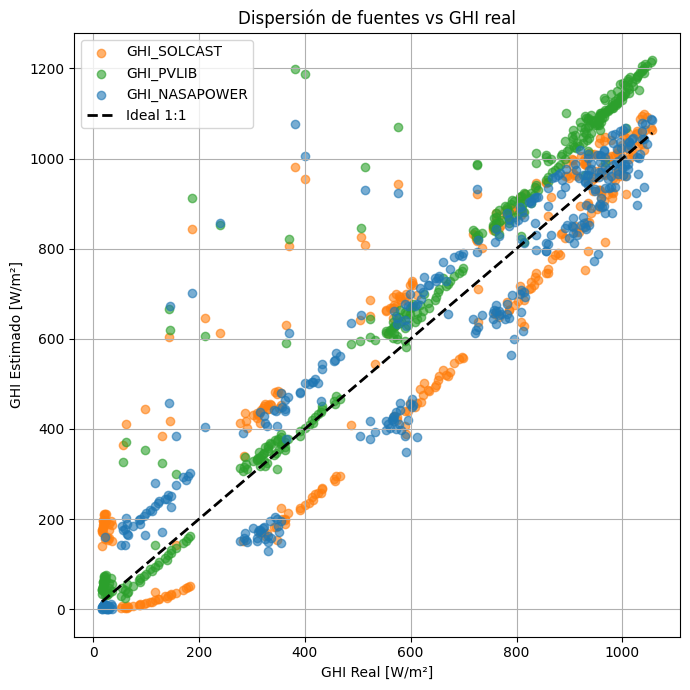

In [ ]:
import matplotlib.pyplot as plt

colores = {
    'GHI_SOLCAST': '#ff7f0e',    # naranja
    'GHI_NASAPOWER': '#1f77b4',  # azul
    'GHI_PVLIB': '#2ca02c'       # verde
}

plt.figure(figsize=(7,7))

for pred in fuentes:
    plt.scatter(df_final[real], df_final[pred],
                alpha=0.6, label=pred, color=colores[pred])

# Línea ideal 1:1
plt.plot([df_final[real].min(), df_final[real].max()],
         [df_final[real].min(), df_final[real].max()],
         'k--', lw=2, label='Ideal 1:1')

plt.xlabel('GHI Real [W/m²]')
plt.ylabel('GHI Estimado [W/m²]')
plt.title('Dispersión de fuentes vs GHI real')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1️⃣ Error absoluto (MAE) y cuadrático (RMSE)

NASAPOWER tiene el MAE y RMSE más bajos, es decir, en promedio sus predicciones están más cerca del dato real.

SOLCAST tiene el error más alto.

Interpretación: Para predicciones de magnitud de radiación, NASAPOWER es más confiable.

2️⃣ R²

NASAPOWER también tiene el R² más alto (0.865) → explica mejor la variabilidad de los datos reales.

PVLIB y SOLCAST tienen R² menores (0.825–0.832).

Interpretación: NASAPOWER captura mejor la variación de GHI a lo largo del día/mes.

3️⃣ Correlación

PVLIB tiene la correlación más alta (0.964) → sigue muy bien la tendencia o patrón de subidas y bajadas del GHI, aunque sus valores absolutos estén más alejados (errores más grandes).

NASAPOWER también es buena (0.933), SOLCAST un poco menor (0.917).

Interpretación: PVLIB sigue la tendencia muy bien, pero tiende a sobre- o subestimar magnitudes.

4️⃣ Conclusión práctica

Para predicciones de energía real o análisis donde importa la magnitud, NASAPOWER es la mejor opción (menor error + mayor R²).

Para seguimiento de tendencia o patrones, PVLIB se comporta mejor (alta correlación), pero cuidado porque puede sobre- o subestimar valores absolutos.

SOLCAST es la que menos se ajusta tanto en magnitud como en tendencia.

# **5. ANÁLISIS DEL MOVIMIENTO DE TRACKERS (SEGUIDOR SOLAR)**

En esta etapa del proyecto se procederá a validar la posición de los trackers. Para ello, se compararán los datos medidos directamente en sitio mediante los sensores de posición instalados en los trackers, con los datos obtenidos a través de  la librería PVLIB.


**NOTA:**

**ES IMPORTANTE SABER QUE SE ANALIZARÁ PARTICULARMENTE EL MES DE SEPTIEMBRE DONDE EL TIEMPO EN SITIO PRESENTA RÁFAGAS DE VIENTO MENORES**




Por lo tanto se trabajará con:



*   DATO REAL DE LA POSICIÓN DEL TRACKER OBTENIDO DESDE SCADA EN SITIO

*   LIBRERIA PV LIB (DATO TEÓRICO)



Tal como se trabajó con el recurso solar es importante utilizar las mismas coordenadas del sitio y altitud (msnm).

 --- COORDENADAS Y CONFIGURACIÓN ---

lat, lon, alt = -25.0728, -67.7800, 3700   # San Antonio de los Cobres, Salta
tz = 'America/Argentina/Salta'

In [ ]:
!pip install pvlib pandas matplotlib #Instalación de la Libreria PVLIB

## 5.1. OBTENIENDO POSICIÓN TÉORICA DE TRACKERS EN SITIO (MES DE SEPTIEMBRE)

/tmp/ipython-input-1459812329.py:42: pvlibDeprecationWarning:

Parameter 'apparent_azimuth' has been renamed since 0.13.1. and will be removed soon. Please use 'solar_azimuth' instead.



                           tracker_theta  surface_tilt  surface_azimuth  \
2025-09-01 08:00:00-03:00           60.0          60.0             94.0   
2025-09-01 08:05:00-03:00           60.0          60.0             94.0   
2025-09-01 08:10:00-03:00           60.0          60.0             94.0   
2025-09-01 08:15:00-03:00           60.0          60.0             94.0   
2025-09-01 08:20:00-03:00           60.0          60.0             94.0   

                                 aoi  
2025-09-01 08:00:00-03:00  30.079396  
2025-09-01 08:05:00-03:00  29.343811  
2025-09-01 08:10:00-03:00  28.634380  
2025-09-01 08:15:00-03:00  27.956301  
2025-09-01 08:20:00-03:00  27.313811  
✅ Archivo Excel guardado correctamente en: posicion_tracker_salta_sep.xlsx


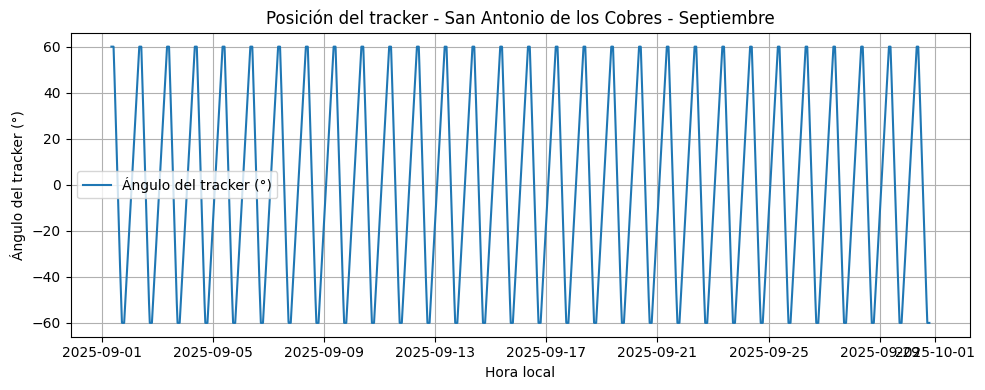

In [ ]:
# ===============================================================
# CÁLCULO DE POSICIÓN DE TRACKER A UN EJE (pvlib)
# ===============================================================

# Requisitos:
# pip install pvlib pandas matplotlib

import pandas as pd
import pvlib
from pvlib.location import Location
from pvlib import tracking, irradiance
import matplotlib.pyplot as plt

# --- COORDENADAS Y CONFIGURACIÓN ---
lat, lon, alt = -25.0728, -67.7800, 3700   # San Antonio de los Cobres, Salta
tz = 'America/Argentina/Salta'

# --- PERÍODO: septiembre, de 08:00 a 19:00 cada 5 min ---
start = '2025-09-01 08:00'
end   = '2025-09-30 19:00'
freq  = '5min'

# --- PARÁMETROS DEL TRACKER ---
axis_tilt = 0.0              # eje horizontal (deg)
axis_azimuth = 4           # eje orientado Norte–Sur (0 = norte, 90 = este)
max_angle = 60.0             # límite de giro ±60°
backtrack = False              # backtracking activado
gcr = 0.475                    # relación cobertura del suelo (typ 0.2–0.4)

# ===============================================================
# 1️⃣ GENERAR FECHAS Y POSICIÓN SOLAR
# ===============================================================

times = pd.date_range(start=start, end=end, freq=freq, tz=tz)
site = Location(latitude=lat, longitude=lon, altitude=alt, tz=tz)
solpos = site.get_solarposition(times)

# ===============================================================
# 2️⃣ CALCULAR POSICIÓN DEL TRACKER
# ===============================================================

trk = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=axis_tilt,
    axis_azimuth=axis_azimuth,
    max_angle=max_angle,
    backtrack=backtrack,
    gcr=gcr
)

# ===============================================================
# 3️⃣ CALCULAR ÁNGULO DE INCIDENCIA (opcional)
# ===============================================================

trk['aoi'] = irradiance.aoi(
    surface_tilt=trk['surface_tilt'],
    surface_azimuth=trk['surface_azimuth'],
    solar_zenith=solpos['apparent_zenith'],
    solar_azimuth=solpos['azimuth']
)

# ===============================================================
#  Ajustes de variables
# ===============================================================

# 1️⃣ Redefinir que horizontal = 90°
trk['tracker_theta_custom'] = trk['tracker_theta'] + 90

# 2️⃣ Cuando el Sol está por debajo del horizonte → dormir en 120°
# (podés cambiar 120 por otro valor si querés otra inclinación)
trk.loc[solpos['apparent_zenith'] > 90, 'tracker_theta_custom'] = 120

trk = trk.between_time('08:00', '19:00')
#cambiar nombre a columna

# ===============================================================
# 4️⃣ MOSTRAR RESULTADOS Y GUARDAR
# ===============================================================

print(trk[['tracker_theta','surface_tilt','surface_azimuth','aoi']].head())


# Guardar en Excel
excel_path = 'posicion_tracker_salta_sep.xlsx'

# Eliminamos el timezone para evitar errores en Excel
trk_copy = trk.copy()
trk_copy.index = trk_copy.index.tz_localize(None)

trk_copy.to_excel(excel_path, index=True)
print(f"✅ Archivo Excel guardado correctamente en: {excel_path}")
# ===============================================================
# 5️⃣ GRÁFICO DEL ÁNGULO DE TRACKER
# ===============================================================

plt.figure(figsize=(10,4))
plt.plot(trk.index, trk['tracker_theta'], label='Ángulo del tracker (°)')
plt.title('Posición del tracker - San Antonio de los Cobres - Septiembre')
plt.xlabel('Hora local')
plt.ylabel('Ángulo del tracker (°)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
trk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3990 entries, 2025-09-01 08:00:00-03:00 to 2025-09-30 19:00:00-03:00
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tracker_theta         3990 non-null   float64
 1   aoi                   3990 non-null   float64
 2   surface_azimuth       3990 non-null   float64
 3   surface_tilt          3990 non-null   float64
 4   tracker_theta_custom  3990 non-null   float64
dtypes: float64(5)
memory usage: 187.0 KB


In [ ]:
trk_copy['TIME'] = trk_copy.index

## 5.2. OBTENIENDO POSICIÓN REAL DE TRACKERS EN SITIO (MES DE SEPTIEMBRE)

In [ ]:
import gdown
# ID del archivo
file_id = '1pjRIVE3y0o8D9-ZDG9Im38AkFRlCjiVZ'

# Construir la URL de descarga
url = f'https://drive.google.com/uc?id={file_id}'

# Ruta donde se guardará el archivo
output = '/content/Datos_DATOS_NCU.xlsx'

# Descargar el archivo
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1pjRIVE3y0o8D9-ZDG9Im38AkFRlCjiVZ
To: /content/Datos_DATOS_NCU.xlsx
100%|██████████| 7.46M/7.46M [00:00<00:00, 35.4MB/s]


'/content/Datos_DATOS_NCU.xlsx'

In [ ]:
# Leer el archivo Excel
df_ncu = pd.read_excel('/content/Datos_DATOS_NCU.xlsx')

# Ver las primeras filas
df_ncu.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,t_stamp,em1/vel_viento,em1/temp_panel_1,em1/temp_amb,ncu_1/angulo_actual_box_3
0,2025-08-31 19:18:52.102,0.000000,0.000000,0.000000,120.300003
1,2025-08-31 23:54:27.791,0.000000,0.000000,2.161095,120.300003
2,2025-08-31 23:56:07.795,0.000000,-2.684355,2.161095,120.300003
3,2025-08-31 23:59:31.794,13.644000,-2.684355,2.161095,120.300003
4,2025-08-31 23:59:47.794,18.719999,-2.684355,2.161095,120.300003


In [ ]:
df_ncu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232490 entries, 0 to 232489
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   t_stamp                    232490 non-null  object 
 1   em1/vel_viento             232490 non-null  float64
 2   em1/temp_panel_1           232490 non-null  float64
 3   em1/temp_amb               232490 non-null  float64
 4   ncu_1/angulo_actual_box_3  232490 non-null  float64
dtypes: float64(4), object(1)
memory usage: 8.9+ MB


In [ ]:
df_ncu['t_stamp'] = pd.to_datetime(df_ncu['t_stamp'])

In [ ]:
df_ncu= df_ncu.rename(columns={'t_stamp': 'TIME'})

In [ ]:
import datetime
# Asegurarse que TIME sea datetime completo (fecha + hora)
df_ncu['TIME'] = pd.to_datetime(df_ncu['TIME'])

# Filtrar solo entre 08:00 y 19:00 (hora completa)

# Definir rango de fechas (ej: todo septiembre 2025)
fecha_inicio = '2025-09-01'
fecha_fin    = '2025-09-30'



# Redondear hacia abajo al múltiplo de 5 minutos
df_ncu['TIME_5MIN'] = df_ncu['TIME'].dt.floor('5min')

# Filtrar por fecha y hora
df_filtrado = df_ncu[
    (df_ncu['TIME'].dt.date >= pd.to_datetime(fecha_inicio).date()) &
    (df_ncu['TIME'].dt.date <= pd.to_datetime(fecha_fin).date()) &
    (df_ncu['TIME'].dt.hour >= 8) &
    (df_ncu['TIME'].dt.hour <= 20 )
]


In [ ]:
# Redondear hacia abajo al múltiplo de 5 minutos
df_filtrado['TIME_5MIN'] = df_filtrado['TIME'].dt.floor('5min')

# Agrupar por fecha + hora + minuto (cada 5 minutos) y calcular promedio
df_promedio_5min = df_filtrado.groupby('TIME_5MIN').mean().reset_index()

/tmp/ipython-input-3932542454.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_promedio_5min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TIME_5MIN                  4679 non-null   datetime64[ns]
 1   TIME                       4679 non-null   datetime64[ns]
 2   em1/vel_viento             4679 non-null   float64       
 3   em1/temp_panel_1           4679 non-null   float64       
 4   em1/temp_amb               4679 non-null   float64       
 5   ncu_1/angulo_actual_box_3  4679 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 219.5 KB


In [ ]:
# Filtrar solo las filas con hora menor o igual a 19:01
df_promedio_5min = df_promedio_5min[df_promedio_5min['TIME'].dt.time <= pd.to_datetime("19:05").time()]

In [ ]:
# Guardar en Excel
excel_path = 'posicion_tracker_salta_sep_FILTRADO.xlsx'

# Eliminamos el timezone para evitar errores en Excel
NCU_copy = df_promedio_5min.copy()
#NCU_copy.index = NCU_copy.index.tz_localize(None)

NCU_copy.to_excel(excel_path, index=True)
print(f"✅ Archivo Excel guardado correctamente en: {excel_path}")
# ===============================================================

✅ Archivo Excel guardado correctamente en: posicion_tracker_salta_sep_FILTRADO.xlsx


In [ ]:
# Merge usando TIME_5MIN de df1 como referencia
df_concat = pd.merge(df_promedio_5min, trk_copy, left_on='TIME_5MIN', right_on='TIME', how='left')



print(df_concat.head())

            TIME_5MIN                        TIME_x  em1/vel_viento  \
0 2025-09-01 08:00:00 2025-09-01 08:02:40.495652352       20.268000   
1 2025-09-01 08:05:00 2025-09-01 08:07:33.967952384       14.264571   
2 2025-09-01 08:10:00 2025-09-01 08:12:24.793272576       15.380182   
3 2025-09-01 08:15:00 2025-09-01 08:17:33.924080128       15.441120   
4 2025-09-01 08:20:00 2025-09-01 08:22:07.909678592       12.359571   

   em1/temp_panel_1  em1/temp_amb  ncu_1/angulo_actual_box_3  tracker_theta  \
0         -5.222792     -0.512691                  88.599998           60.0   
1         -3.774698     -0.449120                  88.599998           60.0   
2         -2.761765     -0.054137                  88.599998           60.0   
3         -1.565547     -0.080236                  85.959998           60.0   
4         -0.253889      0.362733                  75.092857           60.0   

         aoi  surface_azimuth  surface_tilt  tracker_theta_custom  \
0  30.079396             94.0

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TIME_5MIN                  3989 non-null   datetime64[ns]
 1   TIME_x                     3989 non-null   datetime64[ns]
 2   em1/vel_viento             3989 non-null   float64       
 3   em1/temp_panel_1           3989 non-null   float64       
 4   em1/temp_amb               3989 non-null   float64       
 5   ncu_1/angulo_actual_box_3  3989 non-null   float64       
 6   tracker_theta              3989 non-null   float64       
 7   aoi                        3989 non-null   float64       
 8   surface_azimuth            3989 non-null   float64       
 9   surface_tilt               3989 non-null   float64       
 10  tracker_theta_custom       3989 non-null   float64       
 11  TIME_y                     3989 non-null   datetime64[ns]
dtypes: dat

Es importante aclarar que existe una diferencia en la referencia de ángulo utilizada para los datos de posición de los paneles. Para los datos obtenidos directamente en sitio, la posición correspondiente a 0° (panel en posición horizontal, tipo “mesa”) se registra como 90°, mientras que en PVLIB se considera 0° para la misma posición.

Por lo tanto, para realizar una comparación correcta entre ambas fuentes, es necesario ajustar los datos considerando esta diferencia:

**Cuando el panel esté mirando al este, se deberá restar 90° a los datos medidos en sitio.**

**Cuando el panel esté mirando al oeste, la posición real se calculará como 90° menos la posición medida en sitio.**

Esta corrección asegura que las posiciones de los trackers sean comparables entre las distintas fuentes de datos.

In [ ]:
import numpy as np
conditions = [
   df_concat['ncu_1/angulo_actual_box_3'] < 90,
   df_concat['ncu_1/angulo_actual_box_3'] >= 90

]

choices = [
   (df_concat['ncu_1/angulo_actual_box_3'] - 90) * -1,  # caso < 90, multiplicar por -1
    90 - df_concat['ncu_1/angulo_actual_box_3'],  # caso > 90

]

df_concat['angulo_control_box_custom'] = np.select(conditions, choices)

In [ ]:
# Guardar en Excel
excel_path = 'posicion_tracker_MERGE.xlsx'

# Eliminamos el timezone para evitar errores en Excel
MERGE_NCU= df_concat.copy()
#NCU_copy.index = NCU_copy.index.tz_localize(None)

MERGE_NCU.to_excel(excel_path, index=True)
print(f"✅ Archivo Excel guardado correctamente en: {excel_path}")
# ===============================================================

✅ Archivo Excel guardado correctamente en: posicion_tracker_MERGE.xlsx


In [ ]:
MERGE_NCU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TIME_5MIN                  3989 non-null   datetime64[ns]
 1   TIME_x                     3989 non-null   datetime64[ns]
 2   em1/vel_viento             3989 non-null   float64       
 3   em1/temp_panel_1           3989 non-null   float64       
 4   em1/temp_amb               3989 non-null   float64       
 5   ncu_1/angulo_actual_box_3  3989 non-null   float64       
 6   tracker_theta              3989 non-null   float64       
 7   aoi                        3989 non-null   float64       
 8   surface_azimuth            3989 non-null   float64       
 9   surface_tilt               3989 non-null   float64       
 10  tracker_theta_custom       3989 non-null   float64       
 11  TIME_y                     3989 non-null   datetime64[ns]
 12  angulo

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Asegurar columna DATE
MERGE_NCU['DATE'] = MERGE_NCU['TIME_5MIN'].dt.date

# Obtener lista de fechas únicas de septiembre
fechas = sorted(MERGE_NCU['DATE'].unique())

# Crear subplots: 6 filas x 5 columnas = 30 gráficos
fig = make_subplots(
    rows=6, cols=5,
    shared_xaxes=False,
    shared_yaxes=False,
    subplot_titles=[str(f) for f in fechas]
)

# Loop por cada fecha
row, col = 1, 1
for fecha in fechas:
    df_dia = MERGE_NCU[MERGE_NCU['DATE'] == fecha]

    # Agregar línea teórica
    fig.add_trace(go.Scatter(
        x=df_dia['TIME_5MIN'],
        y=df_dia['tracker_theta'],
        mode='lines',
        name='Teórico PVlib',
        line=dict(color='royalblue', width=1)
    ), row=row, col=col)

    # Agregar puntos reales
    fig.add_trace(go.Scatter(
        x=df_dia['TIME_5MIN'],
        y=df_dia['angulo_control_box_custom'],
        mode='lines',
        name='Real',
        line=dict(color='orange', width=1)
    ), row=row, col=col)

    # Avanzar posición en la grilla
    col += 1
    if col > 5:
        col = 1
        row += 1

# Ajustes visuales
fig.update_layout(
    height=3500, width=2500,  # tamaño tipo hoja A3
    title_text="Posición Tracker Real vs PVlib - Septiembre 2025",
    showlegend=False,
    margin=dict(t=100)
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Asegurar columna DATE
MERGE_NCU['DATE'] = MERGE_NCU['TIME_5MIN'].dt.date

# Seleccionar los días que querés graficar
dias_interes = [
    pd.to_datetime('2025-09-01').date(),
    pd.to_datetime('2025-09-09').date(),
    pd.to_datetime('2025-09-10').date()
]

# Crear subplots (1 fila x 3 columnas)
fig = make_subplots(
    rows=1, cols=3,
    shared_yaxes=False,
    subplot_titles=[str(d) for d in dias_interes]
)

# Loop por cada día
col = 1
for fecha in dias_interes:
    df_dia = MERGE_NCU[MERGE_NCU['DATE'] == fecha]

    # Línea teórica
    fig.add_trace(go.Scatter(
        x=df_dia['TIME_5MIN'],
        y=df_dia['tracker_theta'],
        mode='lines',
        name='Teórico PVlib',
        line=dict(color='royalblue', width=1)
    ), row=1, col=col)

    # Línea real
    fig.add_trace(go.Scatter(
        x=df_dia['TIME_5MIN'],
        y=df_dia['angulo_control_box_custom'],
        mode='lines',
        name='Real',
        line=dict(color='orange', width=1)
    ), row=1, col=col)

    col += 1

# Ajustes visuales
fig.update_layout(
    height=800, width=2400,  # formato apaisado
    title_text="Posición Tracker Real vs PVlib - Días 01, 09 y 10 Septiembre 2025",
    showlegend=True,
    margin=dict(t=100)
)

fig.show()

In [ ]:
import pandas as pd

# Asegurarse de que TIME_5MIN es datetime
MERGE_NCU['TIME_5MIN'] = pd.to_datetime(MERGE_NCU['TIME_5MIN'])

# Crear columna DATE
MERGE_NCU['DATE'] = MERGE_NCU['TIME_5MIN'].dt.date

# Días a analizar
dias_interes = [
    pd.to_datetime('2025-09-01').date(),
    pd.to_datetime('2025-09-09').date(),
    pd.to_datetime('2025-09-10').date()
]

# Filtrar solo los días seleccionados
df_filtrado = MERGE_NCU[MERGE_NCU['DATE'].isin(dias_interes)]

# Filtrar entre 10:00 y 17:00
df_filtrado = df_filtrado[
    (df_filtrado['TIME_5MIN'].dt.hour >= 10) &
    (df_filtrado['TIME_5MIN'].dt.hour <= 17)
]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import plotly.express as px

# Días a analizar
dias_interes = [
    pd.to_datetime('2025-09-01').date(),
    pd.to_datetime('2025-09-09').date(),
    pd.to_datetime('2025-09-10').date()
]

metricas = []

for fecha in dias_interes:
    df_dia = MERGE_NCU[
        (MERGE_NCU['DATE'] == fecha) &
        (MERGE_NCU['TIME_5MIN'].dt.hour >= 10) &
        (MERGE_NCU['TIME_5MIN'].dt.hour <= 17)
    ]

    real = df_dia['angulo_control_box_custom']
    teorico = df_dia['tracker_theta']
    error = real - teorico

    r2 = r2_score(real, teorico)
    corr = real.corr(teorico)
    std_error = np.std(error)

    metricas.append({
        'Fecha': fecha,
        'R2': r2,
        'Correlación': corr,
        'Std Error (°)': std_error
    })

df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Graficar
fig = px.bar(
    df_metricas.melt(id_vars='Fecha', var_name='Métrica', value_name='Valor'),
    x='Fecha',
    y='Valor',
    color='Métrica',
    barmode='group',
    title='R², Correlación y Desviación Std del Error - Tracker vs PVlib (10-17h)'
)
fig.show()

        Fecha        R2  Correlación  Std Error (°)
0  2025-09-01  0.964461     0.991811       4.827102
1  2025-09-09  0.981358     0.996739       2.977896
2  2025-09-10  0.969041     0.994661       3.817142


📊 Conclusión general:

✔️ Todos los indicadores (R² > 0.96, correlación > 0.99, error < 5°) muestran que:

El sistema de seguimiento real se comporta de forma muy coherente con el modelo PVlib.

Cualquier diferencia restante (2–5°) puede deberse a:

calibración del sensor de ángulo,

errores mecánicos del tracker,

desfases horarios (por segundos o minutos),

pequeñas variaciones topográficas o de instalación.

#**6. CONCLUSIONES PROVISORIAS**

**1. Validación de posiciones de trackers**


Los trackers se comportan muy coherentemente con el modelo PVLIB, mostrando R² > 0.96, correlación > 0.99 y errores menores a 5°.

Las pequeñas diferencias (2–5°) pueden explicarse por:

Calibración del sensor de ángulo.

Desfase mecánico o de instalación.

Desfases horarios mínimos.

Variaciones topográficas locales.

Esto confirma la representatividad y confiabilidad de los datos medidos en sitio para análisis de seguimiento solar.

**2. Validación de radiación solar**

**NASAPOWER** es la fuente más confiable para predicción de magnitud, con MAE y RMSE más bajos y R² más alto (0.865).

**PVLIB** sigue mejor la tendencia de los datos (correlación 0.964), aunque tiende a sobre- o subestimar valores absolutos.

**SOLCAST** presenta mayor error y menor ajuste tanto en magnitud como en tendencia.

*Conclusión práctica:*



*   Para cálculo de energía generada, NASAPOWER es la mejor opción.
*   Para análisis de patrones diarios o horarios, PVLIB puede ser útil.


**3.  Hipótesis confirmadas**

**H1:** Representatividad de APIs y librerías → Confirmada para trackers (alta correlación y R²) y parcialmente para radiación solar (NASAPOWER más confiable).

**H2:** Mejor API de radiación → Confirmada: NASAPOWER muestra menor error y mayor R².

**H3:** Anomalías en posición de trackers → Se detectan desviaciones mínimas, dentro de tolerancia esperada (2–5°).

**H4:** Relación viento y posición -30° → Requiere análisis adicional de velocidad de viento para validar, pero la metodología permite identificar posiciones de seguridad.

#**7. FUTURAS LÍNEAS DE INVESTIGACIÓN**


**Optimización de predicción de energía**


*   Entrenar modelos de Machine Learning usando variables de NASAPOWER y PVLIB combinadas, para mejorar precisión y capturar tanto magnitud como tendencia.


**Monitoreo de trackers**


*   Integrar alertas automáticas para desviaciones mayores a 5° por fallas mecánicas o viento.

*   Analizar correlación entre velocidad de viento y ángulo de seguridad (-30°) para validar protocolos de protección.



**Validación temporal y estacional**



*   Comparar desempeño de APIs y trackers en distintos meses y condiciones climáticas extremas.

*   Evaluar si las desviaciones de PVLIB o SOLCAST se acentúan en días nublados o con radiación baja.



**Análisis de incertidumbre en generación energética**

*   Cuantificar energía perdida debido a errores de posicionamiento de trackers.

*   Estimar intervalos de confianza en predicciones de energía mensual usando modelos basados en Random Forest o Decision Tree.




